# Creating Chaos: The Double Pendulum and The Weather #

The double pendulum is a simple system that shows rich dynamic motion along with sensitivity to changes in initial conditions. The double pendulum is not only a great analytical math and physics problem, but also shows why weather forecasts cannot be considered accurate past a certain timeframe (usually around 7 days). To better understand the overlap in the double pendulum and weather forecasts, one should first understand Chaos theory. Chaos theory concerns deterministic systems whose behavior can, in principle, be predicted. Chaotic systems are predictable for a while and then 'appear' to become random[[1]](https://en.wikipedia.org/wiki/Chaos_theory#Introduction). With this in mind, we can now apply the principals of weather forecasting to the double pendulum. 

In forecasting the weather, a meteorologist will take multiple runs of a numerical weather prediction (NWP) model, and then use the outcomes from each run to then determine the most likely outcome for the weather within the forecast period. In each run of the NWP, the forecaster will define a specific set of intial conditions based off of in-situ and remote sensing data collection methods, and then run the models based on each of these possible sets of conditions. These conditions can range from upper level atmospheric pressure and cloud cover, to surface wind speed and topological features. As a front moves from one place to another, it can encounter a range of conditions that can all create vastly different outcomes for the system in the matter of minutes to days. Both minor and major changes to the initial conditions defined in the NWP model result in vastly different weather forecasts, similar to the impacts of changing the initial conditions of the double pendulum. 

In this notebook we will explore three changes to intial conditions of the double pendulum system:
- Changing mass of lower arm of the pendulum
- Changing length of lower arm if the pendulum
- Changing initial theta value of lower arm of the pendulum

Each of these changes can be viewed as a different intial conditon used in weather forecasting, however, there are far too many conditions that impact a weather forecast so I do not want to assert any direct cross comparisons. For the sake of general knowledge, some of the specific conditons that impact weather forecasts are:
- Temperature 
- Humidity 
- Precipitation 
- Air pressure 
- Wind speed 
- Wind direction

While we can't do a direct one-to-one thought experiment of initial conditions, we can think about the two pendulum arms as "short term" (weather within 1-3 days) weather and "long term" (weather past 5 days) weather. The short term weather will most likely not experience a sudden and/or drastic change unless acted upon by a strong outside force. In comparison, we wouldn't expect the upper arm path to stray too far from a back and forth motion that is no higher that it's initial release point, except when being heavily influenced by the lower arm path motions. Likewise, we would expect the long term forecast to have many different possible paths depending on what conditions it experiences, just as we expect the same for the lower arm path depending on its initial conditions. Therefore, the upper arm will represent the short-term weather forecast and the the lower arm will represent the long term forecast in these double pendulum simulations.

# Import Relevant Packages

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import double_pendulum as dp

print("All packages imported successfully!")

All packages imported successfully!


# Create Plot With Initial Conditions #
This plot will represent our initial run of the similation and act as a reference to how each additional, later run changes with different initial conditions. X1, Y1 will remain unchanged as they represent the first arm of the pendulum. X2-Xn and Y2-Yn will all vary as we change initial conditions for the system, like theta_0, mass, and rod lengths.

In [41]:
# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 1
m1, m2 = 1, 1

# Initial conditions for y
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0]) # theta_1, z1, theta_2, z2

# Maximum time, time step, and array of times (spaced by time step)
tmax = 30 
dt = 0.01
t = np.arange(0, tmax+dt, dt)

# Do the numerical integration of the Double Pendulum function
y = odeint(dp.double_pen, y0, t, args=(L1, L2, m1, m2))

# Unpack theta values
theta1 = y[:,0]
theta2 = y[:,2]

# Convert to Cartesian coordinates 
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)

x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Plot Initial Results

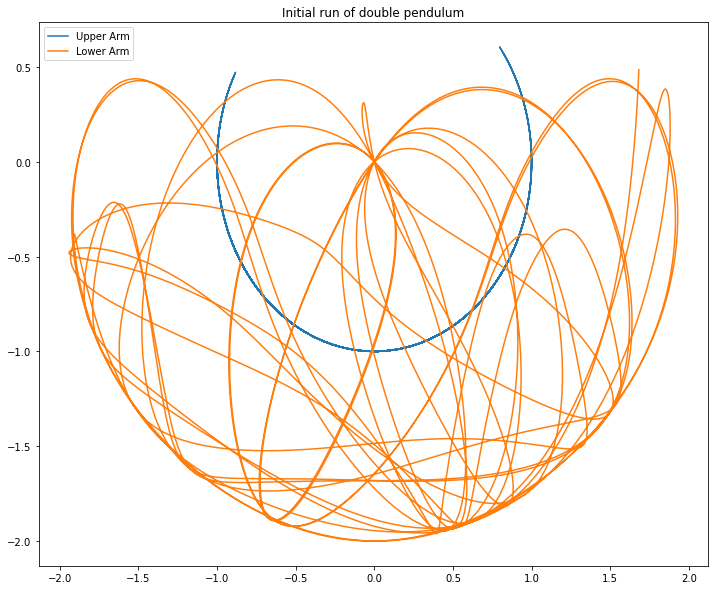

In [5]:
fig = plt.figure(figsize=(12,10))

plt.plot(x1, y1, label="Upper Arm") # Plot arm 1 of pendulum
plt.plot(x2, y2, label="Lower Arm") # Pot arm 2 of pendulum

plt.title("Initial run of double pendulum")
plt.legend(loc="upper left")

plt.show()

# Vary Mass 2 #

Now we will experiment with different initial values. First, let's see what happens when we vary the mass at the end of the lower arm. Below, you will see an array of values for m2. For the sake of not using the same initial conditions twice, I have defined masses that are both lower and higher than the initial run from above. What do you predict will happen to the movement of the lower arm of the pendulum in each case (m2 < m1 and m2 > m1)?

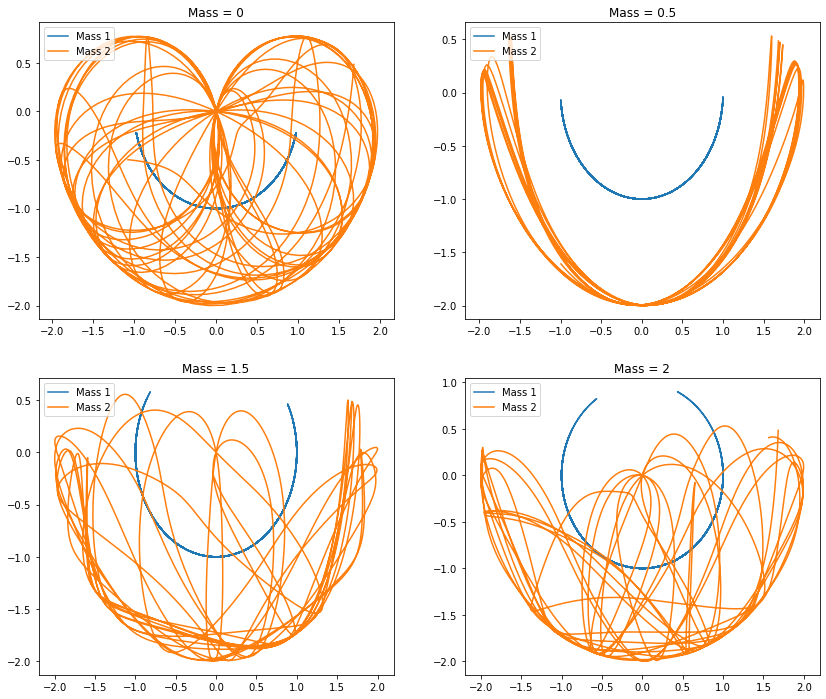

In [6]:
# Create array with different test values for mass 2 
L1, L2 = 1, 1
m1, m2 = 1, [0, 0.5, 1.5, 2]

# Initialize figure for plotting
plt.figure(figsize=(14,12))

# Use a for loop to generate 4 subplots using a different m2 value each time
for i in range(len(m2)):
    ax = plt.subplot(2,2,i+1)
    y = odeint(dp.double_pen, y0, t, args=(L1, L2, m1, m2[i]))
    
    # Unpack theta values for pendulum arms 
    theta1 = y[:,0]
    theta2 = y[:,2]

    # Convert to Cartesian coordinates
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)

    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)

    
    # Create plots and add features for comprehension
    title = "Mass = " + str(m2[i])

    plt.title(title)
    
    ax.plot(x1, y1, label="Mass 1")
    ax.plot(x2, y2, label="Mass 2")
    
    plt.legend(loc = "upper left")
    


# Vary Length 2 #
Next, we will change the length of the lower arm of the double pendulum. Similar to the above run, we will create an array of possible values to use for L2, some shorter than L1 and some longer, and see how that changes the path of the double pendulum. Which run is the most chaotic (has more flips of the lower arm)? Is that the anticipated outcome? 

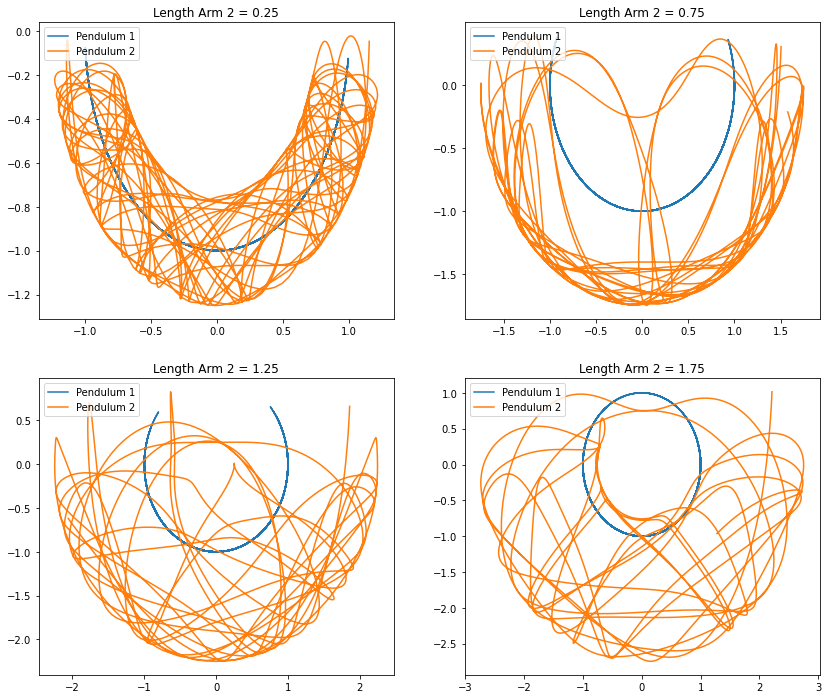

In [7]:
# Create array with different test values for pendulum arm 2 

L1, L2 = 1, [0.25, 0.75, 1.25, 1.75]
m1, m2 = 1, 1

# Initialize figure for plotting
plt.figure(figsize=(14,12))

# Use a for loop to generate 4 subplots using a different L2 value each time
for i in range(len(L2)):
    ax = plt.subplot(2,2,i+1)
    y = odeint(dp.double_pen, y0, t, args=(L1, L2[i], m1, m2))
    
    # Unpack theta values for pendulum arms 
    theta1 = y[:,0]
    theta2 = y[:,2]
    
    # Convert to Cartesian coordinates
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)

    x2 = x1 + L2[i] * np.sin(theta2)
    y2 = y1 - L2[i] * np.cos(theta2)

    
    # Create plots and add features for comprehension
    title = "Length Arm 2 = " + str(L2[i])

    plt.title(title)
    
    ax.plot(x1, y1, label="Pendulum 1")
    ax.plot(x2, y2, label="Pendulum 2")
    
    plt.legend(loc = "upper left")

# Vary Theta 2 #
For the final component of this notebook, we will now look at what happens when we vary the initial position (theta value) of the lower arm. 

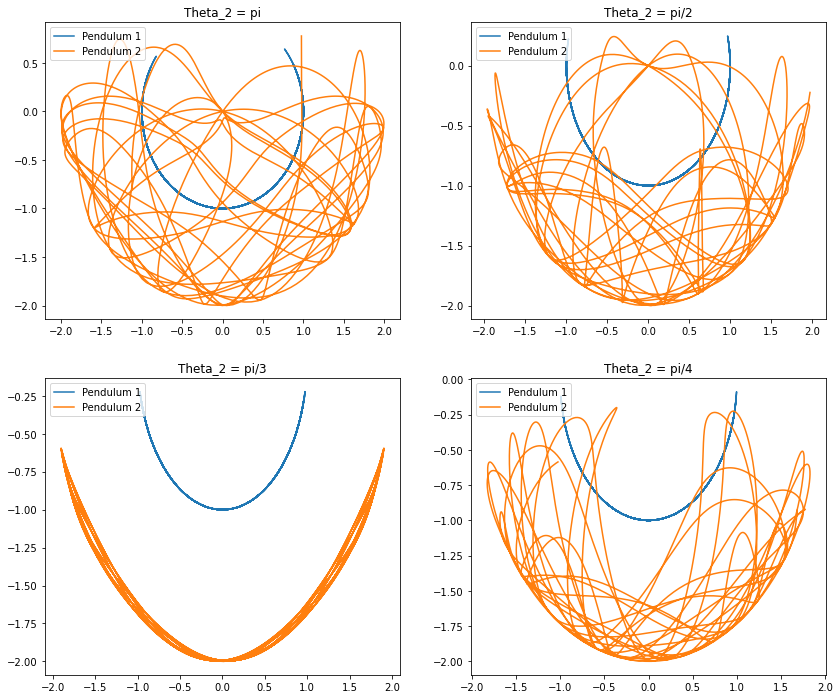

In [8]:
L1, L2 = 1, 1
m1, m2 = 1, 1

T_2 = [np.pi, np.pi/2, np.pi/3, np.pi/4] # Change var name to avoid any conflicts if re-running prior cell(s)

T_str = ['pi', 'pi/2', 'pi/3', 'pi/4'] # For plot title purposes, create array of strings of each T_2 value

# Initialize figure for plotting
plt.figure(figsize=(14,12))

# Use a for loop to generate 4 subplots using a different T_2 value each time
for i in range(len(T_2)):
    ax = plt.subplot(2,2,i+1)
    y1 = np.array([3*np.pi/7, 0, T_2[i], 0]) # theta_1, z1, theta_2, z2
    y = odeint(dp.double_pen, y1, t, args=(L1, L2, m1, m2))
    
    # Unpack theta values for pendulum arms 
    theta1 = y[:,0]
    theta2 = y[:,2]

    # Convert to Cartesian coordinates
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)

    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)

    
    # Create plots and add features for comprehension
    title = "Theta_2 = " + str(T_str[i])

    plt.title(title)
    
    ax.plot(x1, y1, label="Pendulum 1")
    ax.plot(x2, y2, label="Pendulum 2")
    
    plt.legend(loc = "upper left")

# Bonus: Animation of Single Plots #

The double pendulum simulation is used in Atmospheric Sciences as an example of how the weather is considered a chaotic system. The application that is usually used is that if the lower arm flips, the weather will be sunny, if it doesnt, the weather will be cloudy. Then the instructor runs the similation for a specific time period and counts how many flips occur. What the audience should notice is that as time moves on, it becomes more and more difficult to predict if the lower arm will spin or not. Then, to add another level to the demonstration, the instructor can change the initial conditions and run the simulation again, once again counting how many times the lower arm spins in the time period. The audience should take away from this demostration that the weather is easier to predict the closer to the current day it is. As with a double pendulum, it is easy to see that the lower arm will most likely not flip during it's first pass on its path, but when trying to predict the motion of the lower arm at a further timestep, it becomes increasingly harder to predict if it will flip or not. 

To demonstrate the above outlined similation, let's animate a singular double pendulum plot using matplotlib. Try to vary different parameters below and see how the resulting animation changes! To start the animation after making any desired changes to L, m, or y0, simply run this cell as you would a normal cell. To stop the animation, click the 'power' symbol in the top right corner of the displayed plot/animation below.

How many flips do you count in 10 seconds? Does that number change when the initial conditions are also changed? Based on the above runs of the simulation, can you get the pendulum to follow a consistent path (i.e. no flips)?

<IPython.core.display.Javascript object>


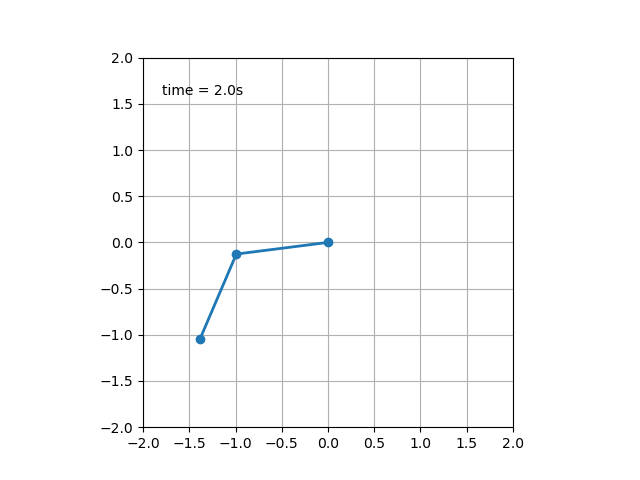

In [45]:
# Enable interactive plot
%matplotlib notebook
 
# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 1
m1, m2 = 1, 1


# Create time array from 0 to 10 seconds with time steps of 0.05 sec
# Using 10 seconds to represent a 10-day forecast 
dt = 0.05 # Time step
t = np.arange(0, 10, dt) # Length of animation below

# Initialize initial conditions for plot
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0]) # theta_1, z1, theta_2, z2 
y = odeint(dp.double_pen, y0, t, args=(L1, L2, m1, m2))

# Unpack theta values
theta1 = y[:,0]
theta2 = y[:,2]

# Convert to Cartesian coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)

x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)


fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    print(line)
    time_text.set_text('')
    return line, time_text


def animate(i):
    xline = [0, x1[i], x2[i]]
    yline = [0, y1[i], y2[i]]

    line.set_data(xline, yline)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = animation.FuncAnimation(fig, animate, range(1, len(y)),
                              interval=dt*1500, blit = True, init_func = init)
plt.show()